# Chapter 16:Training neural networks


In [15]:
import matplotlib.pyplot as plt
import numpy as np

## 0.1 Classifying data with neural networks

# 16.1 Classifying images of handwritten digits

## 16.1.1 Building the 64-dimensional image vectors

In [16]:
from sklearn import datasets
digits = datasets.load_digits()

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

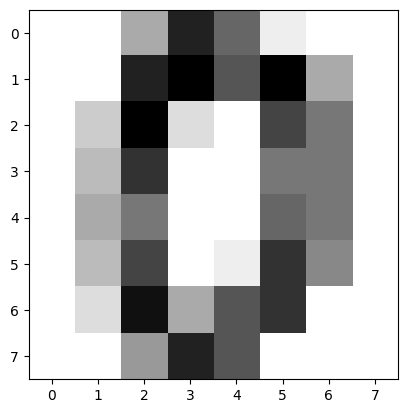

In [18]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

FYI, a way to overlay numbers on the pixels showing their brightness values

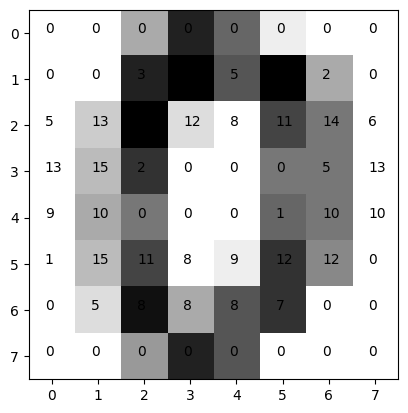

In [19]:
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
for i in range(0,8):
    for j in range(0,8):
        plt.gca().text(i-0.15,j,int(digits.images[0][i][j]))

In [20]:
np.matrix.flatten(digits.images[0])

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [21]:
np.matrix.flatten(digits.images[0]) / 15

array([0.        , 0.        , 0.33333333, 0.86666667, 0.6       ,
       0.06666667, 0.        , 0.        , 0.        , 0.        ,
       0.86666667, 1.        , 0.66666667, 1.        , 0.33333333,
       0.        , 0.        , 0.2       , 1.        , 0.13333333,
       0.        , 0.73333333, 0.53333333, 0.        , 0.        ,
       0.26666667, 0.8       , 0.        , 0.        , 0.53333333,
       0.53333333, 0.        , 0.        , 0.33333333, 0.53333333,
       0.        , 0.        , 0.6       , 0.53333333, 0.        ,
       0.        , 0.26666667, 0.73333333, 0.        , 0.06666667,
       0.8       , 0.46666667, 0.        , 0.        , 0.13333333,
       0.93333333, 0.33333333, 0.66666667, 0.8       , 0.        ,
       0.        , 0.        , 0.        , 0.4       , 0.86666667,
       0.66666667, 0.        , 0.        , 0.        ])

## 16.1.2 Building a random digit classifier

In [22]:
def random_classifier(input_vector):
    return np.random.rand(10)

In [23]:
v = np.matrix.flatten(digits.images[0]) / 15.
result = random_classifier(v)
result

array([0.20508935, 0.58515322, 0.64269535, 0.80131813, 0.67189073,
       0.0797943 , 0.52526204, 0.52408324, 0.41018326, 0.81052573])

**NOTE** because this is random, you will get a different digit result when you re-run the code.

In [24]:
list(result).index(max(result))

9

In [25]:
digits.target[0]

0

## 16.1.3 Measuring performance of the digit classifier

In [26]:
def test_digit_classify(classifier,test_count=1000):
    correct = 0 #<1>
    for img, target in zip(digits.images[:test_count], digits.target[:test_count]): #<2>
        v = np.matrix.flatten(img) / 15. #<3>
        output = classifier(v) #<4>
        answer = list(output).index(max(output)) #<5>
        if answer == target:
            correct += 1 #<6>
    return (correct/test_count) #<7>

In [27]:
test_digit_classify(random_classifier)

0.097

## 16.1.4 Exercises

### Ex16.2
データセット内の9の画像すべての平均を求め、結果の画像をプロットせよ。

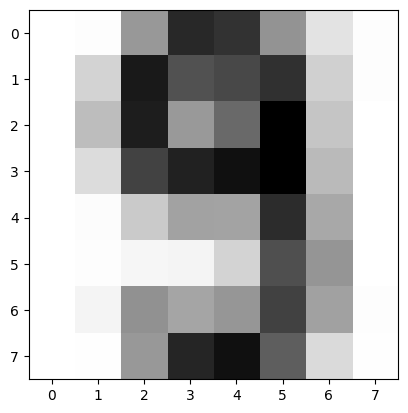

In [28]:
nine_count = 0
nine_image = np.zeros_like(digits.images[0])
for image, target in zip(digits.images, digits.target):
    if target == 9:
        nine_count += 1
        nine_image += image

nine_image = nine_image / nine_count
plt.imshow(nine_image, cmap=plt.cm.gray_r)

### Ex16.3
テストデータセット内のそれぞれの数字の平均画像を求め、その平均画像と対象画像を比較することで、ランダムな分類器よりも優れた分類器を構築せよ。具体的には、各数字の平均画像と対象画像のベクトルの内積を計算すればよい。

In [30]:
# 平均画像を返す関数(答えを見た)
def average_img(i):
    imgs = [img for img,target in zip(digits.images[1000:], digits.target[1000:]) if target==i]
    return sum(imgs) / len(imgs)

# 分類器
def average_img_classifier(input_vector):
    average_imgs = [average_img(i) for i in range(10)]
    average_img_vectors = [np.matrix.flatten(img) / 15 for img in average_imgs]
    inner_products = [np.dot(average_img_vectors[i], input_vector) for i in range(10)]
    result = inner_products / max(inner_products)
    return result

test_digit_classify(average_img_classifier)

0.853

# 16.2 Designing a neural network

## 16.2.1 Organizing neurons and connections

## 16.2.2 Data flow through a neural network

## 16.2.3 Calculating activations

## 16.2.4 Calculating activations in matrix notation

## 16.2.5 Exercises

# 16.3 Building a neural network in Python

## 16.3.1 Implementing an MLP class in Python

In [19]:
class MLP():
    def __init__(self,layer_sizes): #<1>
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m) #<2>
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:]) #<3>
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]] #<4>

In [20]:
nn = MLP([2,3])

**NOTE** these numbers are randomly initialized, so your results below will vary.

In [21]:
nn.weights

[array([[0.04098182, 0.61121605],
        [0.99402839, 0.43278994],
        [0.14826355, 0.39370373]])]

In [22]:
nn.biases

[array([0.62871743, 0.55151304, 0.91445791])]

## 16.3.2 Evaluating the MLP

In [23]:
from math import exp
def sigmoid(x):
    return 1 / (1+exp(-x))

In [24]:
class MLP():
    def __init__(self,layer_sizes): #<1>
        self.layer_sizes = layer_sizes
        self.weights = [
            np.random.rand(n,m) #<2>
            for m,n in zip(layer_sizes[:-1],layer_sizes[1:]) #<3>
        ]
        self.biases = [np.random.rand(n) for n in layer_sizes[1:]] #<4>
    def feedforward(self,v):
        activations = [] #<1>
        a = v
        activations.append(a) #<2>
        for w,b in zip(self.weights, self.biases): #<3>
            z = w @ a + b #<4>
            a = [sigmoid(x) for x in z] #<5>
            activations.append(a) #<6>
        return activations
    def evaluate(self,v):
        return np.array(self.feedforward(v)[-1])

## 16.3.3 Testing the classification performance of an MLP

In [25]:
nn = MLP([64,16,10])

In [26]:
v = np.matrix.flatten(digits.images[0]) / 15.

In [27]:
nn.evaluate(v)

array([0.99996588, 0.99829151, 0.99979785, 0.9998958 , 0.99991507,
       0.99982444, 0.9999176 , 0.99863889, 0.99977906, 0.99887847])

In [28]:
test_digit_classify(nn.evaluate)

0.099

## 16.3.4 Exercises

# 16.4 Training a neural network using gradient descent

## 16.4.1 Framing training as a minimization problem

## 16.4.2 Calculating gradients with backpropagation

## 16.4.3 Automatic training with scikit-learn

In [29]:
x = np.array([np.matrix.flatten(img) for img in digits.images[:1000]]) / 15.0
y = digits.target[:1000]

In [30]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(16,), #<1>
                    activation='logistic', #<2>
                    max_iter=100, #<3>
                    verbose=10, #<4>
                    random_state=1, #<5>
                    learning_rate_init=.1) #<6>

In [31]:
mlp.fit(x,y)

Iteration 1, loss = 2.21958598
Iteration 2, loss = 1.56912978
Iteration 3, loss = 0.98970277
Iteration 4, loss = 0.57473464
Iteration 5, loss = 0.34048448
Iteration 6, loss = 0.21495855
Iteration 7, loss = 0.14366771
Iteration 8, loss = 0.11077020
Iteration 9, loss = 0.08764273
Iteration 10, loss = 0.07193546
Iteration 11, loss = 0.06020348
Iteration 12, loss = 0.04961899
Iteration 13, loss = 0.03979645
Iteration 14, loss = 0.03334502
Iteration 15, loss = 0.02996006
Iteration 16, loss = 0.02603968
Iteration 17, loss = 0.02355514
Iteration 18, loss = 0.02137348
Iteration 19, loss = 0.01967878
Iteration 20, loss = 0.01751214
Iteration 21, loss = 0.01617330
Iteration 22, loss = 0.01460386
Iteration 23, loss = 0.01408517
Iteration 24, loss = 0.01270504
Iteration 25, loss = 0.01191634
Iteration 26, loss = 0.01114222
Iteration 27, loss = 0.01045989
Iteration 28, loss = 0.00983648
Iteration 29, loss = 0.00920912
Iteration 30, loss = 0.00890851
Iteration 31, loss = 0.00843426
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [32]:
mlp._predict(x)[0]

array([9.99766643e-01, 8.43331208e-11, 3.47867059e-06, 1.49956270e-07,
       1.88677660e-06, 3.44652605e-05, 6.23829017e-06, 1.09043503e-04,
       1.11195821e-07, 7.79837557e-05])

In [33]:
def sklearn_trained_classify(v):
    return mlp._predict([v])[0]

In [34]:
test_digit_classify(sklearn_trained_classify)

1.0

## 16.4.4 Exercises

# 16.5 Calculating gradients with backpropagation

## 16.5.1 Finding the cost in terms of the last layer weights

## 16.5.1 Finding the cost in terms of the last layer weights

## 16.5.2 Calculating the partial derivatives for the last layer weights using the chain rule

## 16.5.3 Exercises 